# Unicorn Startups

O primeiro passo para ser executado é realizar a importação das bibliotecas necessárias para a execução do projeto. No caso de necessidade de possuir outras bibliotecas, este bloco será responsável por receber todas as bibliotecas.

Aqui, também, foi importado a biblioteca ```warnings``` para filtrar alguns avisos.

In [29]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignorar alguns avisos que podem ocorrer
import warnings
warnings.filterwarnings('ignore')

O próximo passo é realizar a importação do arquivo ```Startups2021.csv``` através do pandas, no formato de um ```DataFrame```. Após o carregamento do DataFrame, verificamos que a base de dados em questão possui 936 linhas (dados) e 8 colunas (atributos), através do comando ```df.shape```.

In [30]:
# Ler os dados do arquivo 'Startups2021.csv'
df = pd.read_csv('Startups2021.csv')

# Verifica o tamanho da Base de Dados
df.shape

(936, 8)

Realizaremos uma primeira visualização da base de dados carregados com o método ```df.head()```, que exibe os primeiros 5 (cinco) registros do DataFrame. Caso deseje exibir mais ou menos valores, basta enviar um valor numério inteiro para o método, como por exemplo ```df.head(3)```, que exibe os primeiros 3 (três) registros.

In [31]:
# Exibe os primeiros 5 (cinco) registros do DataFrame
df.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


É importante analisar também, as ultimas linhas do DataFrame. Para isso, podemos utilizar o método ```df.tail()```, que exibe os ultimos 5 (cinco) registros do DataFrame. Caso deseje exibir mais ou menos valores, basta enviar um valor numério inteiro para o método, como por exemplo ```df.tail(3)```, que exibe os ultimos 3 (três) registros.

In [32]:
# Exibe os ultimos 5 (cinco) registros do DataFrame
df.tail()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
931,931,YipitData,$1,12/6/2021,United States,New York,Internet software & services,"RRE Ventures+, Highland Capital Partners, The ..."
932,932,Anyscale,$1,12/7/2021,United States,Berkeley,Artificial Intelligence,"Andreessen Horowitz, Intel Capital, Foundation..."
933,933,Iodine Software,$1,12/1/2021,United States,Austin,Data management & analytics,"Advent International, Bain Capital Ventures, S..."
934,934,ReliaQuest,$1,12/1/2021,United States,Tampa,Cybersecurity,"KKR, FTV Capital, Ten Eleven Ventures"
935,935,Pet Circle,$1,12/7/2021,Australia,Alexandria,E-commerce & direct-to-consumer,"Prysm Capital, Baillie Gifford & Co., TDM Grow..."


Antes de prosseguirmos com as análises, realizaremos a alteração no nome das colunas para melhor visualização futura.
1. Visualizamos apenas os nomes das colunas através do método ```df.columns```.
2. Através do envio de um dicionário na função ```rename```, realizamos a alteração dos nomes das colunas e indicamos, com o parâmetro ```implace``` como ```True``` para que seja sobrescrito no próprio DataFrame.

In [33]:
# Exibe o nome das colunas do DataFrame
df.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [34]:
# Renomeia as Colunas do DataFrame e sobrescreve o nome no próprio DataFrame
df.rename(columns={
    'Unnamed: 0' : 'Id',
    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($B)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry': 'Setor',
    'Select Investors': 'Investidores',
}, inplace=True)

df.columns

Index(['Id', 'Empresa', 'Valor ($B)', 'Data de Adesão', 'Pais', 'Cidade',
       'Setor', 'Investidores'],
      dtype='object')

Ao visualizar os primeiros dados, é possível verificar que, existem alguns valores que não estão adequados. Para certificar os tipos de dados em cada uma das colunas, executamos o comando abaixo e, comprovamos que os atributos ```Valor ($B)``` não é do tipo ```float``` (devido a presença do símbolo $ antes do valor) e o atributo ```Data de Adesão``` não é do tipo ```date``` (devido ao formato incorreto de data).

Além destas observações, é possível notar que temos a presença de alguns campos nulos nos atributos ```Cidade```, que possui apenas 921 dados e no atributo ```Investidores```, que possui apenas 935 informações cadastradas. Vale ressaltar que possuimos, na nossa base de dados, **936 linhas**.

In [35]:
# Verifica o tipo de informação armazenada em cada uma das colunas do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($B)      936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Observe que, ao realizar a contagem dos campos nulos do DataFrame, temos que faltam 15 cidades e 1 investidor que possuem valores nulos. A partir daí, cabe ao Analista verificar a importância destes dados, pois, existem diferentes métodos para lidar com a falta destes dados.

In [36]:
# Verifica os campos nulos
df.isnull().sum()

Id                 0
Empresa            0
Valor ($B)         0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

Uma outra forma de visualização destes dados é através de um gráfico. Podemos utilizar o Seaborn para exibir algumas informações sobre estes dados. Cada um dos traços em branco representa um dado (ou conjunto de dados) que são nulos.

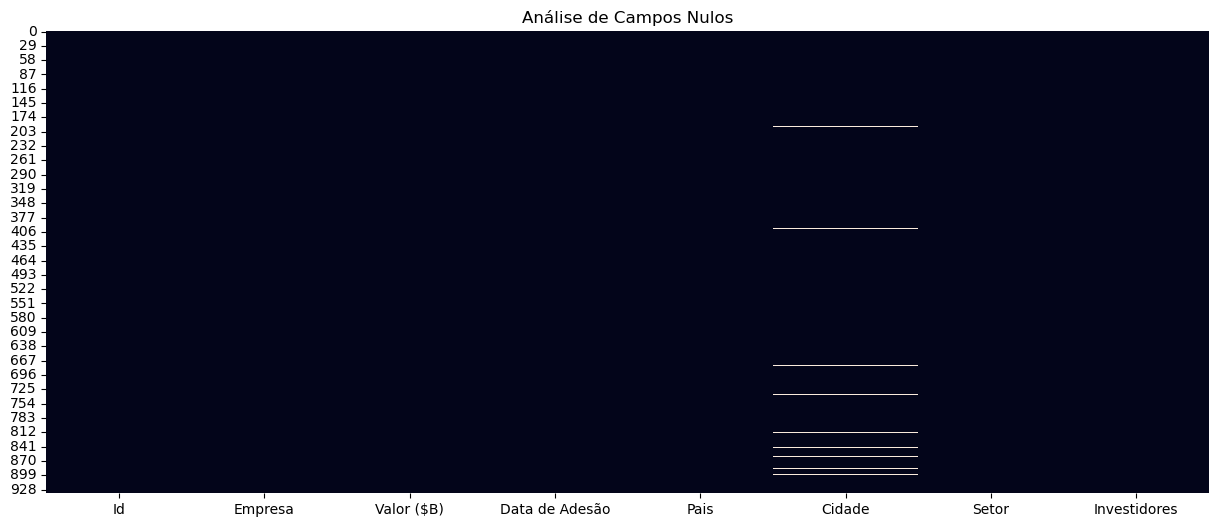

In [37]:
# Gráfico
plt.figure(figsize=(15,6))
plt.title('Análise de Campos Nulos')
sns.heatmap(df.isnull(), cbar=False);

**Opção 1**: Realizar a remoção da Coluna que possui os dados nulos

Através do comando ```pandas.DataFrame.drop``` conseguimos realizar a exclusão da coluna ```Cidade``` e ```Investidores``` do DataFrame. Caso queira que esta alteração passe para o DataFrame, adiciona-se o parâmetro ```inplace=True```.

No código abaixo, primeiramente, foi removido a coluna ```Cidade``` atribuindo a uma segunda variável e, posteriormente, com o parâmetro ```inplace=True```, realizou-se a retirada da coluna ```Investidores```.

Vale ressaltar que, este método só está sendo utilizado por questões de **estudos** e não é indicado para o nosso caso, visto que perde-se cerca de **24,78%** de todos os dados do DataFrame ao excluir as colunas ```Cidade``` e ```Investidores```.

In [38]:
# Remove a coluna 'Cidade' do DataFrame df e atribui a um novo DataFrame (df_aux)
df_aux = df.drop('Cidade', axis=1)

# Remove a coluna 'Investidores' do DataFrame df_aux e atribui a alteração diretamente no próprio DataFrame (inplace=True)
df_aux.drop('Investidores', axis=1, inplace=True)

# Exibe as colunas do df_aux, agora, sem a coluna 'Cidade'
df_aux.columns

Index(['Id', 'Empresa', 'Valor ($B)', 'Data de Adesão', 'Pais', 'Setor'], dtype='object')

In [39]:
# Verifica os campos nulos do novo DataFrame que está sem a coluna 'Cidade'
df_aux.isnull().sum()

Id                0
Empresa           0
Valor ($B)        0
Data de Adesão    0
Pais              0
Setor             0
dtype: int64


**Opção 2**. Realizar a remoção da Linha que possui os dados nulos

Esta opção já pode ser utilizada para o nosso caso. A perda das linhas podem não gerar perdas significativas **dependendo da futura aplicação**, visto que, para alguns recursos de inteligência artificial, tais dados podem significar a identificação de novos padrões ou auxiliar na métrica do algoritmo.

De forma geral, a remoção de dados de um DataFrame quase sempre não é aconselhada pois podemos perder informações valiosas com a exclusão.

Dado a ressalva, para realizar a remoção de uma linha que possui dados faltantes, utilizaremos, junto com o comando ```pandas.DataFrame.drop```, uma busca por valores nulos em cada uma das colunas, conforme exemplo abaixo.

In [40]:
# Realiza uma cópia do DataFrame inicial para não haver alterações nele
df_aux = df.copy(deep=True)

# Remove as linhas (index) que possuem valores nulos (NaN) na coluna 'Cidade' e salva as alterações no próprio DataFrame
df_aux.drop(df_aux.loc[pd.isnull(df_aux['Cidade'])].index, inplace=True)

# Remove as linhas (index) que possuem valores nulos (NaN) na coluna 'Cidade' e salva as alterações no próprio DataFrame
df_aux.drop(df_aux.loc[pd.isnull(df_aux['Investidores'])].index, inplace=True)

# Exibe o novo tamanho do DataFrame
df_aux.shape

(920, 8)

In [41]:
# Verifica os campos nulos do novo DataFrame que está sem a coluna 'Cidade'
df_aux.isnull().sum()

Id                0
Empresa           0
Valor ($B)        0
Data de Adesão    0
Pais              0
Cidade            0
Setor             0
Investidores      0
dtype: int64

Outra forma de eliminar as linhas que possuem, ao menos, um valor nulo é através do método ```dropna()```.

In [42]:
# Realiza uma cópia do DataFrame inicial para não haver alterações nele
df_aux = df.copy(deep=True)

# Remove as linhas que possuem ao menos um valor nulo (NaN)
df_aux.dropna(inplace=True)

# Exibe o novo tamanho do DataFrame
df_aux.shape

(920, 8)

In [43]:
# Verifica os campos nulos do novo DataFrame que está sem a coluna 'Cidade'
df_aux.isnull().sum()

Id                0
Empresa           0
Valor ($B)        0
Data de Adesão    0
Pais              0
Cidade            0
Setor             0
Investidores      0
dtype: int64

**Opção 3**. Substituir os valores faltantes pela média de valores da Coluna

Para os casos de variáveis do tipo numéricas, esta abordagem torna-se bem simples, bastando realizar a média numérica de acordo com os dados da coluna e substituir os valores faltantes (NaN) pela média.

Já para dados Categóricos, isso passa a ser uma abordagem complexa. Para essa base de dados, é inviável realizar tal substituição, visto que os atributos que estão com falta de dados, são do tipo categóricos e são relevantes para a consistência dos dados.

**Opção 4**. Alterar cada um dos dados manualmente através da obtenção das informações

Para uma base de dados "pequena" com poucas faltas, seria uma ótima abordagem completar a base de dados através da obtenção das informações faltantes, sendo esta, a melhor abordagem de todas. Porém, nem sempre este requisito é atendido, devido a falta de informações disponíveis ou, dependendo da quantidade de dados faltantes, da inviabilidade de obter tais informações.

Para verificar quais linhas possuem os dados faltantes e para simular a incerção destes dados no DataFrame, basta filtrar de acordo com a coluna desejada, conforme já realizado anteriormente.

In [44]:
# Realiza uma cópia do DataFrame inicial para não haver alterações nele
df_aux = df.copy(deep=True)

# Exibe as linhas (index) que possuem ao menos um valor nulo (NaN) no DataFrame
df_aux[df_aux.isna().any(axis=1)]

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
11,11,FTX,$25,7/20/2021,Hong Kong,NaN,Fintech,"Sequoia Capital, Thoma Bravo, Softbank"
192,192,HyalRoute,$3.5,5/26/2020,Singapore,NaN,Mobile & telecommunications,Kuang-Chi
399,399,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
572,572,Trax,$1.3,7/22/2019,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
677,677,Amber Group,$1.1,6/21/2021,Hong Kong,NaN,Fintech,"Tiger Global Management, Tiger Brokers, DCM Ve..."
682,682,Carousell,$1.1,9/15/2021,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
710,710,LinkSure Network,$1,1/1/2015,China,Shanghai,Mobile & telecommunications,NaN
735,735,WeLab,$1,11/8/2017,Hong Kong,NaN,Fintech,"Sequoia Capital China, ING, Alibaba Entreprene..."
812,812,PatSnap,$1,3/16/2021,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner..."
840,840,Moglix,$1,5/17/2021,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"


Ao analisar os dados faltantes, podemos verificar que a Base de Dados possui erros no processo de incersão dos dados. Observe que na coluna "Pais" encontramos valores como "Hong Kong", sendo estes, cidades e não países.

Para analisar mais prontamente esta base de dados, será necessário verificar os dados categóricos por agrupamento.

In [45]:
df.groupby('Pais')['Id'].count()

Pais
Argentina                 1
Australia                 6
Austria                   2
Belgium                   2
Bermuda                   1
Brazil                   15
Canada                   15
Chile                     1
China                   169
Colombia                  2
Croatia                   1
Czech Republic            1
Denmark                   2
Estonia                   1
Finland                   2
France                   19
Germany                  23
Hong Kong                 7
India                    51
Indonesia                 4
Indonesia,                1
Ireland                   3
Israel                   21
Japan                     6
Lithuania                 1
Luxembourg                1
Malaysia                  1
Mexico                    5
Netherlands               5
Nigeria                   1
Norway                    3
Philippines               2
Santa Clara               1
Senegal                   1
Singapore                11
South Africa   

Realização de Algumas alterações nos campos
1. Modificou-se as vezes em que 'United States,' aparecia, removendo a vírgula
2. Idem item anterior para Indonesia
3. Onde aparecia Hong Kong como país, foi atribuido como cidade
4. Alterou o país Hong Kong por China

In [46]:
df.loc[df['Pais'] == 'United States,', 'Pais'] = 'United States'
df.loc[df['Pais'] == 'Indonesia,', 'Pais'] = 'Indonesia'
df.loc[df['Pais'] == 'Hong Kong', 'Cidade'] = 'Hong Kong'
df.loc[df['Pais'] == 'Hong Kong', 'Pais'] = 'China'

In [47]:
df.groupby('Pais')['Id'].count()

Pais
Argentina                 1
Australia                 6
Austria                   2
Belgium                   2
Bermuda                   1
Brazil                   15
Canada                   15
Chile                     1
China                   176
Colombia                  2
Croatia                   1
Czech Republic            1
Denmark                   2
Estonia                   1
Finland                   2
France                   19
Germany                  23
India                    51
Indonesia                 5
Ireland                   3
Israel                   21
Japan                     6
Lithuania                 1
Luxembourg                1
Malaysia                  1
Mexico                    5
Netherlands               5
Nigeria                   1
Norway                    3
Philippines               2
Santa Clara               1
Senegal                   1
Singapore                11
South Africa              2
South Korea              11
Spain          

In [48]:
df[df.isna().any(axis=1)]

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
192,192,HyalRoute,$3.5,5/26/2020,Singapore,NaN,Mobile & telecommunications,Kuang-Chi
399,399,Advance Intelligence Group,$2,9/23/2021,Singapore,NaN,Artificial intelligence,"Vision Plus Capital, GSR Ventures, ZhenFund"
572,572,Trax,$1.3,7/22/2019,Singapore,NaN,Artificial intelligence,"Hopu Investment Management, Boyu Capital, DC T..."
682,682,Carousell,$1.1,9/15/2021,Singapore,NaN,E-commerce & direct-to-consumer,"500 Global, Rakuten Ventures, Golden Gate Vent..."
710,710,LinkSure Network,$1,1/1/2015,China,Shanghai,Mobile & telecommunications,NaN
812,812,PatSnap,$1,3/16/2021,Singapore,NaN,Internet software & services,"Sequoia Capital China, Shunwei Capital Partner..."
840,840,Moglix,$1,5/17/2021,Singapore,NaN,E-commerce & direct-to-consumer,"Jungle Ventures, Accel, Venture Highway"
843,843,Matrixport,$1,6/1/2021,Singapore,NaN,Fintech,"Dragonfly Captial, Qiming Venture Partners, DS..."
848,848,Carro,$1,6/14/2021,Singapore,NaN,E-commerce & direct-to-consumer,"SingTel Innov8, Alpha JWC Ventures, Golden Gat..."
861,861,bolttech,$1,7/1/2021,Singapore,NaN,Fintech,"Mundi Ventures, Doqling Capital Partners, Acti..."


Como opção escolhida, resolveu-se remover as linhas (rows) que possuem dados nulos da base de dados.

In [49]:
# Remove as linhas que possuem ao menos uma informação vazia
df.dropna(inplace=True, ignore_index=True)

# Exibe o tamanho da base de dados após a remoção das linhas
df.shape

(924, 8)

In [50]:
# Exibe as linhas que possuem dados nulos. Observe que não há informações exibidas.
df[df.isna().any(axis=1)]

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores


In [51]:
# Exibe os primeiros 5 (cinco) registros do DataFrame
df.head()

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


Vamos analisar o campo Setor. Observe que, temos o termo 'Fintech' aparecendo 187 vezes e o termo 'Finttech', digitado incorretamente, aparecendo uma única vez.

Realizaremos a mudança do termo para o correto.

In [54]:
# Exibe os valores únicos por Setor
df['Setor'].value_counts()

Setor
Fintech                                187
Internet software & services           166
E-commerce & direct-to-consumer         99
Artificial intelligence                 67
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     50
Cybersecurity                           41
Data management & analytics             36
Mobile & telecommunications             35
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: count, dtype: int64

In [55]:
df.loc[df['Setor'] == 'Finttech', 'Setor'] = 'Fintech'

df['Setor'].value_counts()

Setor
Fintech                                188
Internet software & services           166
E-commerce & direct-to-consumer         99
Artificial intelligence                 67
Health                                  63
Other                                   51
Supply chain, logistics, & delivery     50
Cybersecurity                           41
Data management & analytics             36
Mobile & telecommunications             35
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Name: count, dtype: int64

Vamos realizar o mesmo procedimento no campo 'Empresa'. Observe que a empresa 'Bolt' aparece duas vezes, vamos observar as linhas em questão. É possível verificar que a empresa em questão segue dois Setores distintos e possue investidores distintos, o que não indica provavel equívoco na inserção dos dados. O melhor meio seria através de pesquisas sobre estas informações.

In [58]:
# Exibe os valores únicos por Empresa
df['Empresa'].value_counts()

Empresa
Bolt              2
Bytedance         1
Project44         1
Tealium           1
Public            1
                 ..
Voodoo            1
Uptake            1
KeepTruckin       1
Skydance Media    1
Pet Circle        1
Name: count, Length: 923, dtype: int64

In [61]:
df.loc[df['Empresa'] == 'Bolt']

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
94,94,Bolt,$6,10/8/2021,United States,San Francisco,Fintech,"Activant Capital, Tribe Capital, General Atlantic"
141,141,Bolt,$4.75,5/29/2018,Estonia,Tallinn,Auto & transportation,"Didi Chuxing, Diamler, TMT Investments"


## Tratamento de Dados

Vamos observar algumas informações relacionadas aos tipos de dados nas colunas. Observe que existe o campo ID, que não adiciona informações pertinentes ao sistema. Podemos remover esta coluna sem perda. Além disso, a coluna 'Valor ($B)' está no tipo 'object' e não do tipo numérico. Assim como ocorre com 'Data de Adesão', que não está no tipo date.

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              924 non-null    int64 
 1   Empresa         924 non-null    object
 2   Valor ($B)      924 non-null    object
 3   Data de Adesão  924 non-null    object
 4   Pais            924 non-null    object
 5   Cidade          924 non-null    object
 6   Setor           924 non-null    object
 7   Investidores    924 non-null    object
dtypes: int64(1), object(7)
memory usage: 57.9+ KB


Com o comando head() é possível ter um vislumbre dos dados. Veja que, o campo 'Valor ($B)' possui um símbolo de cifrão no início do número. Antes de converter para tipo flutuante (double, float), é necessário remover este símbolo.

In [53]:
df.head()

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [63]:
# Transforma os dados da coluna 'Valor ($B)' em numérico e remove o símbolo de '$'
df['Valor ($B)'] = pd.to_numeric(df['Valor ($B)'].apply(lambda linha: linha.replace('$', '')))

df.head()

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              924 non-null    int64  
 1   Empresa         924 non-null    object 
 2   Valor ($B)      924 non-null    float64
 3   Data de Adesão  924 non-null    object 
 4   Pais            924 non-null    object 
 5   Cidade          924 non-null    object 
 6   Setor           924 non-null    object 
 7   Investidores    924 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 57.9+ KB


Conversão da coluna 'Data de Adesão' para o formato correto de data

In [65]:
df['Data de Adesão'] = pd.to_datetime(df['Data de Adesão'])

df.head()

,Id,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              924 non-null    int64         
 1   Empresa         924 non-null    object        
 2   Valor ($B)      924 non-null    float64       
 3   Data de Adesão  924 non-null    datetime64[ns]
 4   Pais            924 non-null    object        
 5   Cidade          924 non-null    object        
 6   Setor           924 non-null    object        
 7   Investidores    924 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 57.9+ KB


Agora, removeremos o campo 'Id', visto que é um número sequencial e não traz informações pertinentes.

In [67]:
# Remove a coluna 'Id' do DataFrame df e atribui a alteração diretamente no próprio DataFrame (inplace=True)
df.drop('Id', axis=1, inplace=True)

df.head()

,Empresa,Valor ($B),Data de Adesão,Pais,Cidade,Setor,Investidores
0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
